Some helper functions.

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd
import os

from IPython.display import display, HTML

def load_data(dir):
    path = os.walk(dir)
    dfs = []
    for root, directories, files in path:
        for file in files:
            if root.split("/")[-1] != "summary":
                if file.split(".")[0] == "listings":
                    f = Path(root) / file
                    dfs.append(pd.read_csv(f))
    df = pd.concat(dfs)
    return df

def get_list_from_text(path):
    with Path(path).open("r") as f:
        valid = f.readlines()
        valid = set(map(lambda x: x.replace("\n", ""), valid))
    return valid

def keep_cols(df, path):
    cols = get_list_from_text(path)
    df = df[cols]
    return df

Load Data.

In [2]:
path = "data"
df = load_data(path)

/home/justin/pycharmprojects/airbnb_eda/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (43,94) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/justin/pycharmprojects/airbnb_eda/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (43,61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Plot correlations.

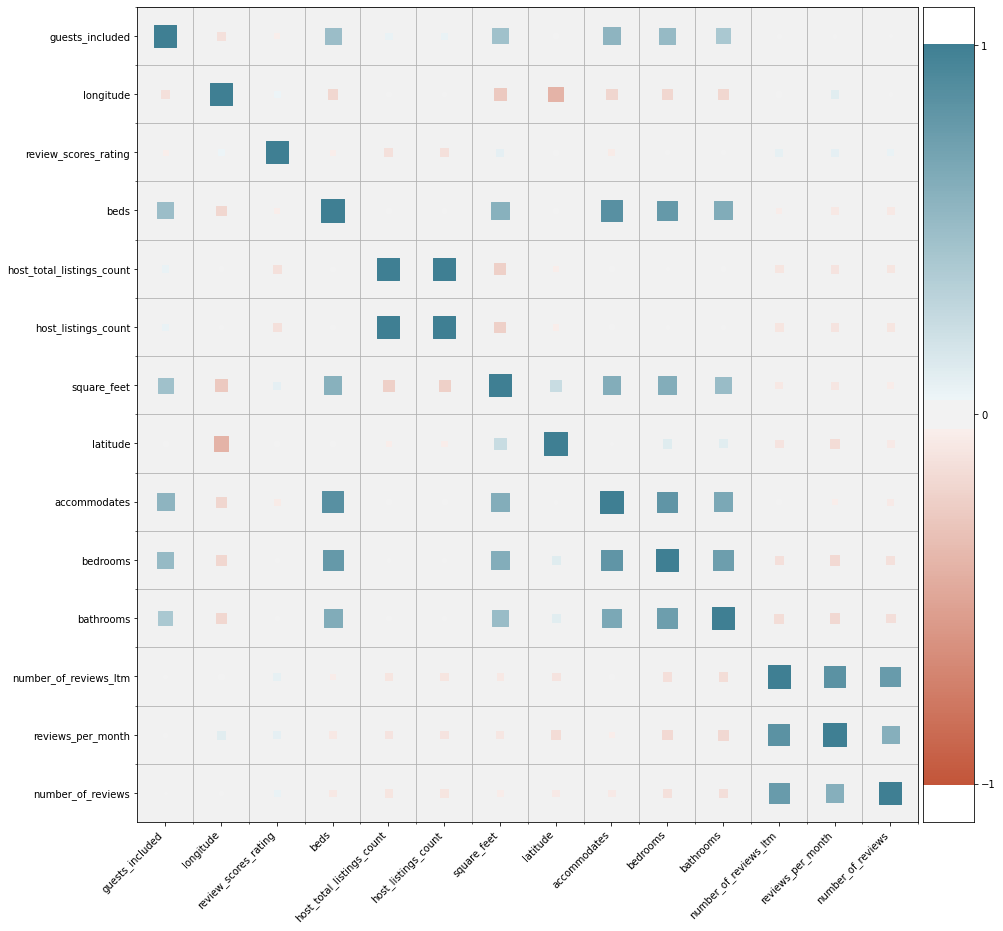

In [6]:
from heatmap import heatmap, corrplot

# def plot_corrs(df):
    # Correlation plot.
    # df = keep_cols(df, "doc/columns/corrplot.txt")
    # plt.figure(figsize=(20, 20))
    # heat_map = sns.heatmap(df.corr())
    # plt.show()
    
# Plot correlation map.
# plot_corrs(df)

df = keep_cols(df, "doc/columns/corrplot.txt")
plt.figure(figsize=(15, 15))
corrplot(df.corr())

Plot Data vs Number of listings.
Did the number of listings decrease at all after the emergence of covid-19?

In [4]:
def date_x_num_listings(df):
    # Filter out junk dates.
    date_path = "doc/dates/valid_dates.txt"
    dates = get_list_from_text(date_path)
    df = df[df["last_scraped"].isin(dates)]

    # Group by date and plot num of listings by date.
    df_ = df.groupby("last_scraped").agg({"id": "count"})
    df_ = df_.reset_index()
    plt.figure(figsize=(20, 10))
    sns.lineplot(data=df_, x="last_scraped", y="id")
    plt.show()

# Date vs number of listings. Did number of listings decrease after shutdown?
date_x_num_listings(df)

KeyError: 'last_scraped'